### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [118]:
data = pd.read_csv("Student_performance_data _.csv")
# index as StudentID
data.set_index('StudentID', inplace=True)
data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 1001 to 3392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 280.3 KB


In [120]:
import seaborn as sns
import math

def plot_column_distributions(df):
    # Set the style for the plots
    sns.set(style="whitegrid")
    
    num_cols = len(df.columns)
    cols_per_row = 3  # Number of subplots per row
    num_rows = math.ceil(num_cols / cols_per_row)
    
    # Create the subplots grid
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes array to easily iterate over it
    
    for i, column in enumerate(df.columns):
        ax = axes[i]
        
        # If the column is numeric, plot a histogram and density plot
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, bins=30, color='skyblue', ax=ax)
            ax.set_title(f'Distribution of {column}', fontsize=14)
            ax.set_xlabel(column)
            ax.set_ylabel('Frequency')
        
        # If the column is categorical, plot a bar plot
        elif df[column].dtype == 'object':
            sns.countplot(data=df, x=column, palette='Set2', ax=ax)
            ax.set_title(f'Distribution of {column}', fontsize=14)
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
    
    # Remove any unused subplots if the number of columns is not a multiple of cols_per_row
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

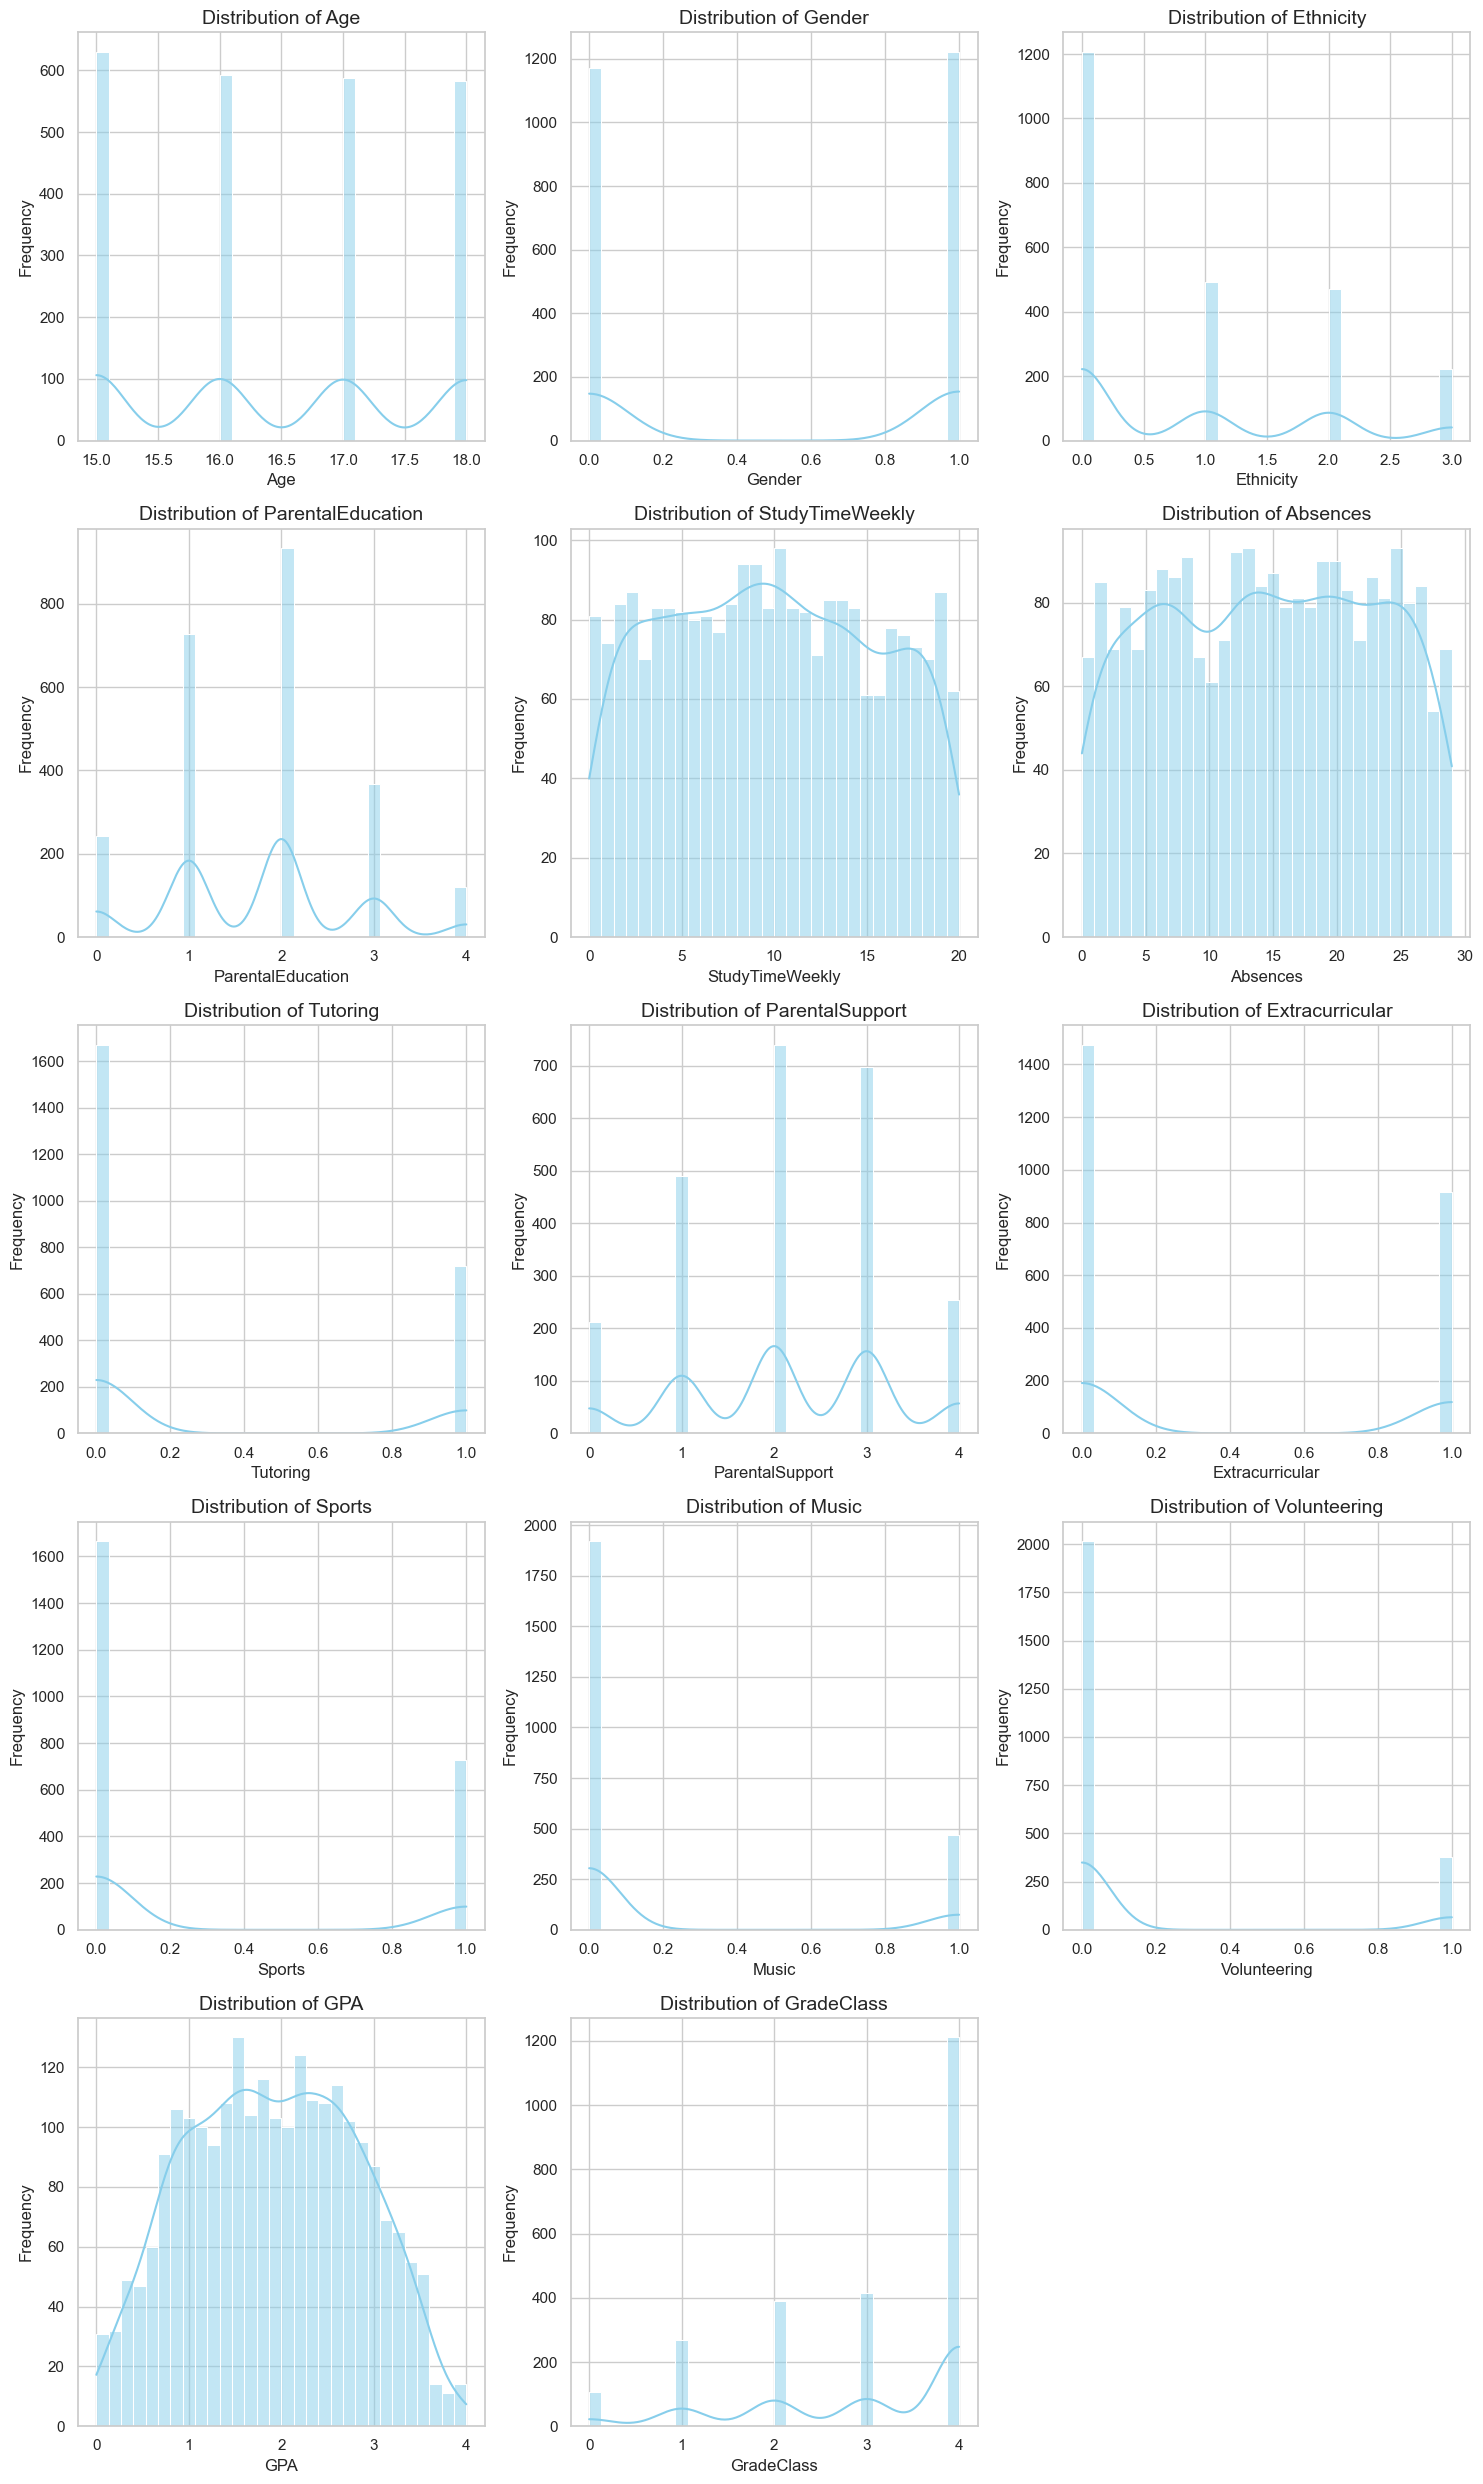

In [121]:
plot_column_distributions(data)

### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [122]:
# drop the nan values
data.dropna(inplace=True)

# Your code here
X = data.drop('GPA', axis=1)
y = data['GPA']

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [123]:
# Your code here
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 1001 to 3392
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GradeClass         2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 261.6 KB


In [124]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 2392 entries, 1001 to 3392
Series name: GPA
Non-Null Count  Dtype  
--------------  -----  
2392 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [125]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [126]:
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1))

C:\Users\ozner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [127]:
# Your code here
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [128]:
# Your code here
# val split of 0.2
history_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.4120 - mae: 0.8864 - val_loss: 0.1277 - val_mae: 0.2910
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1018 - mae: 0.2556 - val_loss: 0.0901 - val_mae: 0.2386
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0743 - mae: 0.2192 - val_loss: 0.0718 - val_mae: 0.2156
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0555 - mae: 0.1924 - val_loss: 0.0608 - val_mae: 0.1994
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0470 - mae: 0.1757 - val_loss: 0.0566 - val_mae: 0.1909
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0398 - mae: 0.1616 - val_loss: 0.0558 - val_mae: 0.1911
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0370 - mae: 0.1572 - val_loss: 0.0601 - val_mae: 0.1967
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0350 - mae: 0.1506 - val_loss: 0.0490 - val_mae: 0.1794
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

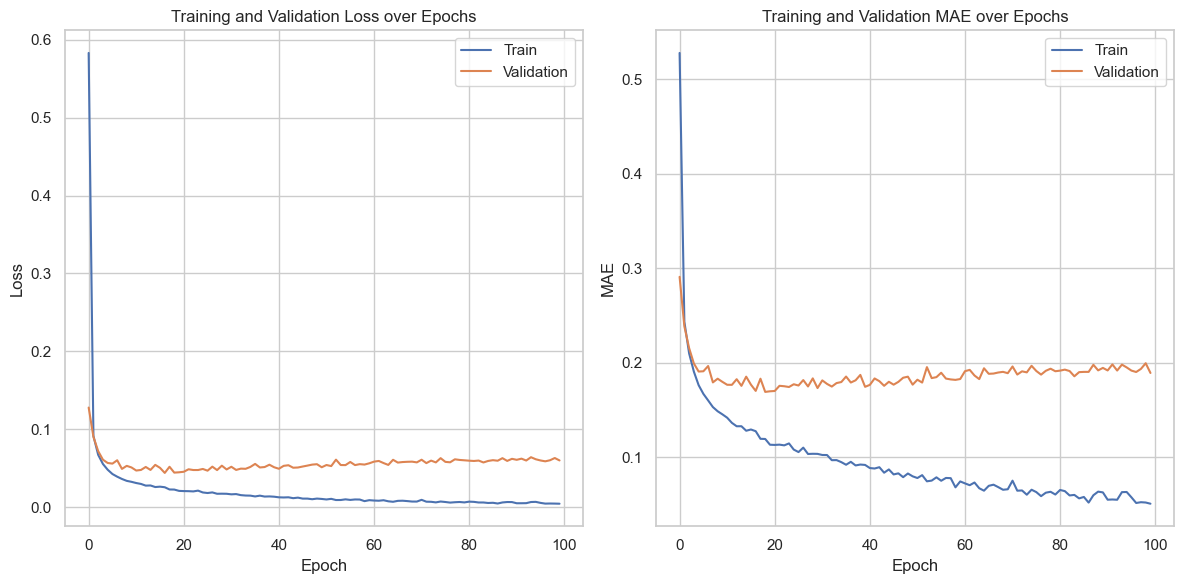

In [129]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Training and Validation Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation mae values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['mae'])
plt.plot(history_1.history['val_mae'])
plt.title('Training and Validation MAE over Epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

The model achieved an equilibrium (in loss) around the 40th epoch, the val and training loss stopped improving. When we talk about mae, is about the 70th epoch.

In [130]:
# Your code here
test_loss, test_mae = model_1.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test MAE: {test_mae}')

Test loss: 0.06580128520727158
Test MAE: 0.202829509973526


Seems to be a decent perfomance for a first model.

### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


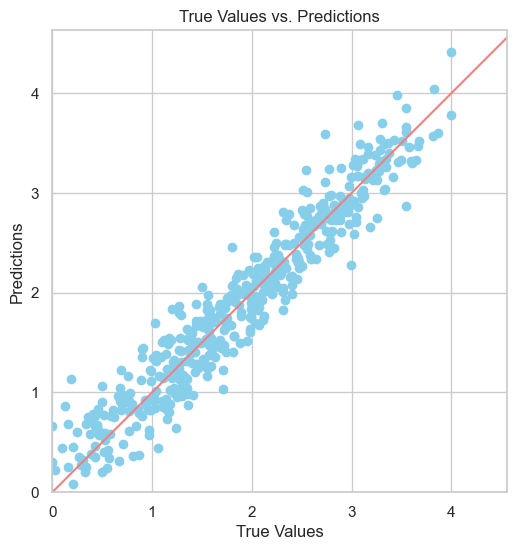

In [131]:
# make predictions
y_pred = model_1.predict(X_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], color='lightcoral')
plt.show()

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9216 - mae: 1.4511 - val_loss: 1.2346 - val_mae: 0.9309
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9789 - mae: 0.8143 - val_loss: 0.9698 - val_mae: 0.8242
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8579 - mae: 0.7672 - val_loss: 0.9181 - val_mae: 0.8083
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8129 - mae: 0.7528 - val_loss: 0.8948 - val_mae: 0.8010
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8251 - mae: 0.7615 - val_loss: 0.9055 - val_mae: 0.8086
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8149 - mae: 0.7559 - val_loss: 0.8951 - val_mae: 0.8031
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7996 - mae: 0.7472 - val_loss: 0.8980 - val_mae: 0.8050
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8048 - mae: 0.7450 - val_loss: 0.9036 - val_mae: 0.8085
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

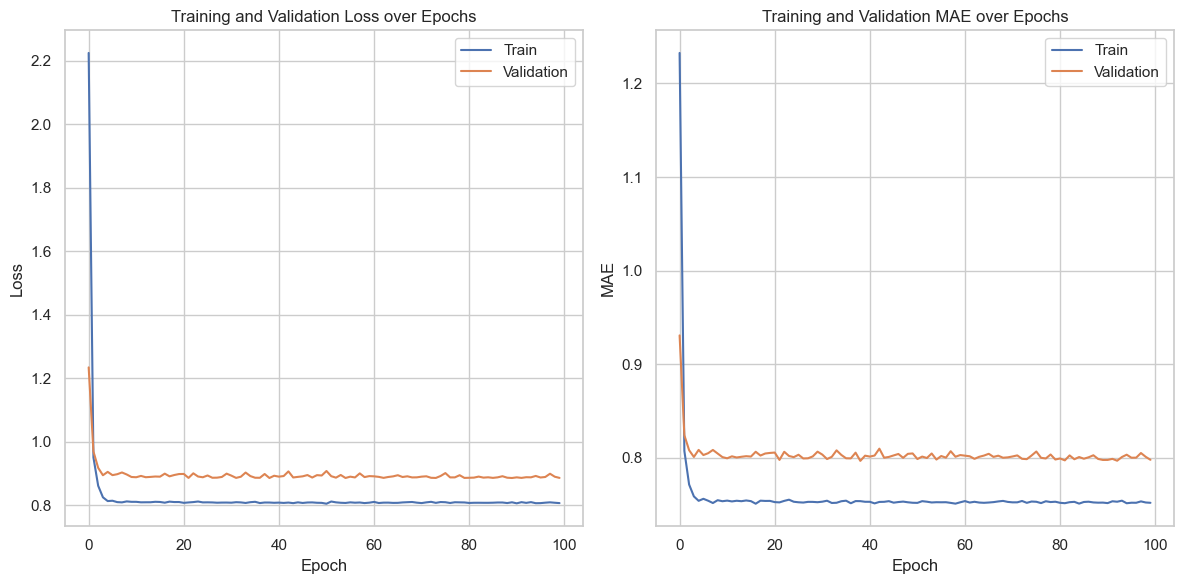

In [132]:
from tensorflow.keras.layers import SimpleRNN

# model 2
model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_shape=(X_train.shape[1], 1)))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# run the model
history_2 = model_2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Training and Validation Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation mae values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['mae'])
plt.plot(history_2.history['val_mae'])
plt.title('Training and Validation MAE over Epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Epoch 1/100


C:\Users\ozner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.4885 - mae: 0.8385 - val_loss: 0.0723 - val_mae: 0.2115
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0642 - mae: 0.1953 - val_loss: 0.0682 - val_mae: 0.2056
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0588 - mae: 0.1921 - val_loss: 0.0637 - val_mae: 0.1985
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0550 - mae: 0.1850 - val_loss: 0.0587 - val_mae: 0.1955
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0524 - mae: 0.1786 - val_loss: 0.0607 - val_mae: 0.1909
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0558 - mae: 0.1866 - val_loss: 0.0486 - val_mae: 0.1757
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0460 - mae: 0.1679 - val_loss: 0.0949 - val_mae: 0.2426
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0532 - mae: 0.1827 - val_loss: 0.0637 - val_mae: 0.2041
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

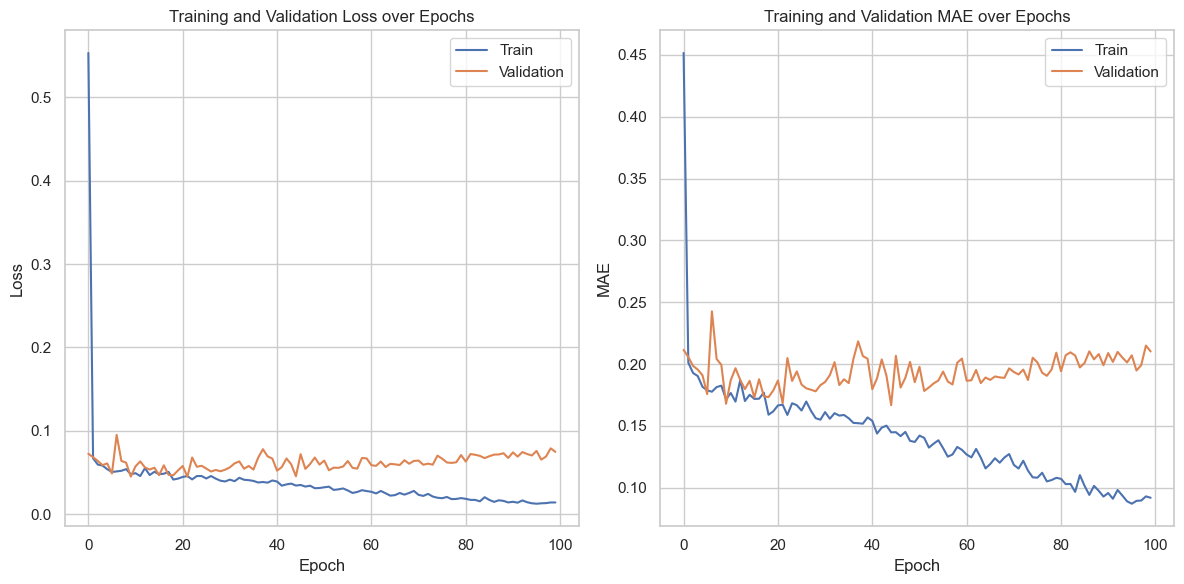

In [133]:
# model 3, change the activation function to tanh
model_3 = Sequential()
model_3.add(SimpleRNN(64, activation='tanh', input_shape=(X_train.shape[1], 1)))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dense(1))

model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# run the model
history_3 = model_3.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Training and Validation Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation mae values
plt.subplot(1, 2, 2)
plt.plot(history_3.history['mae'])
plt.plot(history_3.history['val_mae'])
plt.title('Training and Validation MAE over Epochs')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [134]:
# now, we are going to compare the three models
# Evaluate the models on the test data
test_loss_1, test_mae_1 = model_1.evaluate(X_test, y_test, verbose=0)
test_loss_2, test_mae_2 = model_2.evaluate(X_test, y_test, verbose=0)
test_loss_3, test_mae_3 = model_3.evaluate(X_test, y_test, verbose=0)

# Create a comparison table
comparison_data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Test Loss': [test_loss_1, test_loss_2, test_loss_3],
    'Test MAE': [test_mae_1, test_mae_2, test_mae_3]
}

# Convert to a DataFrame for better display
comparison_df = pd.DataFrame(comparison_data)
# model as index
comparison_df.set_index('Model', inplace=True)

# Print the comparison table
comparison_df

,Test Loss,Test MAE
Model,,
Model 1,0.065801,0.202830
Model 2,0.810765,0.752375
Model 3,0.072925,0.208517


In [135]:
# np random choice of 5 students
students = np.random.choice(data.index, 5, replace=False)

# Get the test data for the selected students
X_test_real = data.loc[students].drop('GPA', axis=1)
y_test_real = data.loc[students, 'GPA']

# Scale the test data
X_test_real = scaler.transform(X_test_real)

# Make predictions using the three models
predictions1 = model_1.predict(X_test_real).flatten()
predictions2 = model_2.predict(X_test_real).flatten()
predictions3 = model_3.predict(X_test_real).flatten()


comparison_df = pd.DataFrame({
    'Estudiante': [1, 2, 3, 4, 5],
    'Modelo 1': predictions1[:5],
    'Modelo 2': predictions2[:5],
    'Modelo 3': predictions3[:5],
    'Actual': y_test_real[:5]
})

# estudiante as index
comparison_df.set_index('Estudiante', inplace=True)

comparison_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


C:\Users\ozner\AppData\Local\Temp\ipykernel_24836\1928102467.py:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  'Actual': y_test_real[:5]


,Modelo 1,Modelo 2,Modelo 3,Actual
Estudiante,,,,
1,3.005904,2.164371,3.195517,3.030439
2,1.789729,1.766156,1.648417,1.683117
3,2.523141,2.010375,2.556119,2.525086
4,2.661056,1.858947,2.516909,2.686717
5,0.982664,1.933208,1.195896,1.007226


El mejor modelo resultó ser el modelo 1!

Descripción de los cambios realizados en cada modelo:
- Modelo 1: 2 capas densas con 64 neuronas cada una, todas con función de activación relu. Optimizador Adam.
- Modelo 2: 2 capas densas con 80 neuronas cada una, todas con función de activación relu. Optimizador Adam.
- Modelo 3: Una capa simpleRNN de 64 neuronas, una capa densa de 64 neuronas y las dos con funcion de activación tanh. Optimizador Adam.